ADS Project

## Set working directory

In [4]:
# Set working directory
import os
os.chdir('C:/Users/Daniel.Costa/ZHAW/Applied Data Science (2022-FS) - General/FINAL')

# Warnings settings
import warnings
warnings.filterwarnings("ignore")

## Import a list with user agents

In [5]:
# Lis with randomly choosed user-agents for rotation
ua_path = "user_agents.txt"
ua_list = [line.rstrip('\n') for line in open(ua_path)]
ua_list[:5]

['Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36',
 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.117 Safari/537.36',
 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36',
 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:72.0) Gecko/20100101 Firefox/72.0',
 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_2) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/13.0.4 Safari/605.1.15']

### (1) Datenerhebung mittels Web Scraping oder API

In [6]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import random
import time
import re

opts = Options()
opts.add_argument("--window-size=1200,800")
opts.add_argument("user-agent=" + random.choice(ua_list))
driver = webdriver.Chrome(executable_path='chromedriver.exe', options=opts)

# Open file-connection
MyFile = open('comparis.csv', 'w', encoding='utf-8')

#Anzahl Zimmer
objRooms = {}

#Wohnungsgrösse in m2
objSize = {}

#Stockwerk
objFloor = {}

#Adresse
obj1 = {}

#Mietzins
obj2 = {}
 

# Range einstellen, wieviele Seite gescrappt werden sollen
MyFile.write('Rooms;Size;Floor;PLZ;Price'+"\n")
for i in range(5):
    
    #url eingeben, achtung: loop weiter hinten um durch die Seiten zu iterieren
    url = str('https://www.comparis.ch/immobilien/result/list?requestobject=%7B%22DealType%22%3A10%2C%22SiteId%22%3A0%2C%22RootPropertyTypes%22%3A%5B1%5D%2C%22PropertyTypes%22%3A%5B%5D%2C%22RoomsFrom%22%3A%221%22%2C%22RoomsTo%22%3Anull%2C%22FloorSearchType%22%3A0%2C%22LivingSpaceFrom%22%3Anull%2C%22LivingSpaceTo%22%3Anull%2C%22PriceFrom%22%3A%22500%22%2C%22PriceTo%22%3Anull%2C%22ComparisPointsMin%22%3A0%2C%22AdAgeMax%22%3A0%2C%22AdAgeInHoursMax%22%3Anull%2C%22Keyword%22%3A%22%22%2C%22WithImagesOnly%22%3Anull%2C%22WithPointsOnly%22%3Anull%2C%22Radius%22%3Anull%2C%22MinAvailableDate%22%3A%221753-01-01T00%3A00%3A00%22%2C%22MinChangeDate%22%3A%221753-01-01T00%3A00%3A00%22%2C%22LocationSearchString%22%3A%228400%22%2C%22Sort%22%3A%223%22%2C%22HasBalcony%22%3Afalse%2C%22HasTerrace%22%3Afalse%2C%22HasFireplace%22%3Afalse%2C%22HasDishwasher%22%3Afalse%2C%22HasWashingMachine%22%3Afalse%2C%22HasLift%22%3Afalse%2C%22HasParking%22%3Afalse%2C%22PetsAllowed%22%3Afalse%2C%22MinergieCertified%22%3Afalse%2C%22WheelchairAccessible%22%3Afalse%2C%22LowerLeftLatitude%22%3Anull%2C%22LowerLeftLongitude%22%3Anull%2C%22UpperRightLatitude%22%3Anull%2C%22UpperRightLongitude%22%3Anull%7D&page=' + str(i+1))  
    time.sleep(2)
    driver.get(url)
    
    print(str('--------- Page:' + str(i+1) + '-------------------------------'))
    #list = [2, 4, 8, 10, 12, 15, 17, 19, 21, 23]
    
    #diese Liste ist notwendig, weil die Reihenfolge der XPATH Objekte nicht aufeinanderfolgend ist.
    list = [4, 8, 10, 12]

    length = len(list)
    #for n in list:
        
    for n in range(length):
         
        #path findet Wohnungstyp
        path = str('/html/body/div[1]/div[1]/div[1]/main/div/div[2]/div[2]/div[2]/div[' + str(list[n]) + ']/a/div/div[3]/div[1]/h3')
       
        #path1 findet Adresse bzw. später PLZ
        path1 = str('/html/body/div[1]/div[1]/div[1]/main/div/div[2]/div[2]/div[2]/div[' + str(list[n]) + ']/a/div/div[3]/div[1]/p[3]')

        #path2 findet Mietzins
        path2 = str('/html/body/div[1]/div[1]/div[1]/main/div/div[2]/div[2]/div[2]/div[' + str(list[n]) + ']/a/div/div[3]/div[2]/div/div/span[2]')
                        
        #Rooms
        objRooms['Object'] = driver.find_element_by_xpath(path).text
        objRooms['Object'] = objRooms['Object'].replace("\n", "")
        regexRooms = re.compile(r'\d.\d|\d')
        objRooms['Object'] = regexRooms.search(objRooms['Object'])     
                        
        #Size
        objSize['Object'] = driver.find_element_by_xpath(path).text
        objSize['Object'] = objSize['Object'].replace("\n", "")
        regexSize = re.compile(r'\d{1,}\w')
        objSize['Object'] = regexSize.search(objSize['Object'])
        if objSize['Object']:
            objSize['Object'] = objSize['Object'].group()
        else:
            objSize['Object'] = 'NA'
        
                #Floor
        objFloor['Object'] = driver.find_element_by_xpath(path).text
        objFloor['Object'] = objFloor['Object'].replace("\n", "")
        regexFloor = re.compile(r'\d\.\s\w|EG')
        objFloor['Object'] = regexFloor.search(objFloor['Object'])
        if objFloor['Object']:
            objFloor['Object'] = objFloor['Object'].group()
        else:
            objFloor['Object'] = 'NA'
        
        #Adresse bzw. PLZ -> Object1
        obj1['Object1'] = driver.find_element_by_xpath(path1).text
        obj1['Object1'] = obj1['Object1'].replace("\n", "")
        regex = re.compile(r'\d{4}')
        obj1['Object1'] = regex.search(obj1['Object1'])
        
        #Mietzins -> Object2
        obj2['Object2'] = driver.find_element_by_xpath(path2).text
        obj2['Object2'] = obj2['Object2'].replace("\n", "")
        obj2['Object2'] = obj2['Object2'].replace("'", "")
        obj2['Object2'] = obj2['Object2'].replace(" ", "")
          
        #Print nur zur Kontrolle, ob es funktioniert
        #print((obj['Object'].group()),";",(obj1['Object1'].group()),";",(obj2['Object2']))         
        
        #Writer schreibt es in die oben geöffnete CSV Datei.
        writer = (objRooms['Object'].group())+";"+(objSize['Object'])+";"+(objFloor['Object'])+";"+(obj1['Object1'].group())+";"+(obj2['Object2'])
        
        # Write to file
        MyFile.write(writer + "\n")
        
        
# Close file-connection
MyFile.close()

# Close driver
driver.close()

--------- Page:1-------------------------------
--------- Page:2-------------------------------
--------- Page:3-------------------------------
--------- Page:4-------------------------------
--------- Page:5-------------------------------


### (2) Datenaufbereitung (dazu können Methoden aus Data Science Fundamantals verwendet werden)

In [7]:
import pandas as pd

# Read data from your prepared example .csv-file (define seperator)
data = pd.read_csv("comparis.csv", sep=";")

df = pd.DataFrame(data)

df.to_csv('comparis_final.csv', mode='a', index=False, header=False)


# Print the header info of data (first five rows)
data.head(15)

,Rooms,Size,Floor,PLZ,Price
0,3.0,58.0,1. E,8400,1658
1,2.0,NaN,NaN,8400,1170
2,3.5,NaN,1. E,8400,1955
3,4.5,85.0,1. E,8400,1795
4,2.0,NaN,2. E,8400,1400
5,2.0,NaN,2. E,8400,1350
6,3.0,62.0,NaN,8400,1450
7,3.5,NaN,NaN,8400,2090
8,2.5,69.0,2. E,8400,1633
9,2.5,NaN,NaN,8400,1300


In [9]:
data = pd.read_csv("comparis.csv", sep=";")
df = pd.DataFrame(data)

df['Size'] = df['Size'].fillna(df['Size'].mean())
df['Floor'] = df['Floor'].str.replace('. E','')
df['Floor'] = df['Floor'].str.replace('EG','0')

df.to_csv('comparis_regex1.csv', mode='a', index=False, header=False)
data.head(15)

,Rooms,Size,Floor,PLZ,Price
0,3.0,58.000000,1,8400,1658
1,2.0,64.090909,NaN,8400,1170
2,3.5,64.090909,1,8400,1955
3,4.5,85.000000,1,8400,1795
4,2.0,64.090909,2,8400,1400
5,2.0,64.090909,2,8400,1350
6,3.0,62.000000,NaN,8400,1450
7,3.5,64.090909,NaN,8400,2090
8,2.5,69.000000,2,8400,1633
9,2.5,64.090909,NaN,8400,1300


#### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### (3) Verwendung eines ML Framework

In [193]:
# Read data from your prepared example .csv-file (define seperator)
data = pd.read_csv("C:/Users/Murat/Downloads/comparis_final.csv", sep=";")

# Print the header info of data (first five rows)
data.head(5)

,Rooms,Size,Floor,PLZ,Price
0,1,30,0,8400,1230
1,1,38,0,8400,1245
2,1,70,0,8400,1830
3,2,62,0,8400,1850
4,3,62,0,8400,1575


In [112]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns 



# file = ‪"C:\Users\Murat\Downloads\comparis_final.csv"
# Read data from your prepared example .csv-file (define seperator)
data = pd.read_csv("C:/Users/Murat/Downloads/comparis_final.csv", sep=";")

# Print the header info of data (first five rows)
data.head(5)

,Rooms,Size,Floor,PLZ,Price
0,1,30,0,8400,1230
1,1,38,0,8400,1245
2,1,70,0,8400,1830
3,2,62,0,8400,1850
4,3,62,0,8400,1575


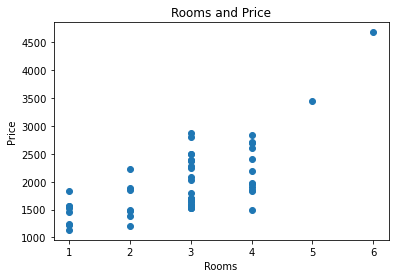

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [113]:
plt.scatter(data.Rooms,data.Price)
plt.title("Rooms and Price")
plt.xlabel("Rooms")
plt.ylabel("Price")
plt.show()
sns.despine

Text(0.5, 1.0, 'Price vs Size')

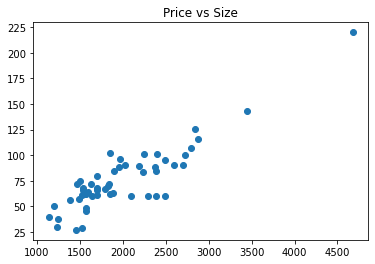

In [114]:
plt.scatter(data.Price,data.Size)
plt.title("Price vs Size")

In [115]:
X = data.drop(['Price'],axis=1).values
y = data['Price'].values

# Split the data

X_train, X_test, y_train, y_test=train_test_split(
    X, y, test_size=0.1, random_state=42)
data.describe()

,Rooms,Size,Floor,PLZ,Price
count,53.000000,53.000000,53.000000,53.0,53.000000
mean,2.886792,75.981132,2.018868,8400.0,1987.207547
std,1.103498,31.196949,1.487002,0.0,630.940426
min,1.000000,27.000000,0.000000,8400.0,1135.000000
25%,2.000000,60.000000,1.000000,8400.0,1550.000000
50%,3.000000,68.000000,2.000000,8400.0,1840.000000
75%,4.000000,90.000000,3.000000,8400.0,2370.000000
max,6.000000,220.000000,6.000000,8400.0,4680.000000


### Self-Check:

     Labels: yes?
     Continous Target: yes?
    
    --> Regression

### Lineare Regression

In [116]:
#Model
regr = linear_model.LinearRegression()

#Fit Data
regr.fit(X_train, y_train)

LinearRegression()

In [120]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# RMSE
y_pred_LinReg = regr.predict(X_test) 
print('LinearRegression() Root Mean squared error: %.2f' % sqrt(mean_squared_error(y_test, y_pred_LinReg)))

LinearRegression() Root Mean squared error: 340.00


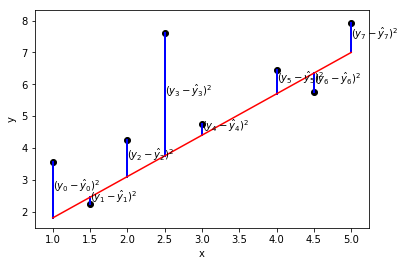

In [121]:
from IPython.display import Image
Image("C:/Users/Murat/Desktop/RMSE.png", width=800)

Der RMSE zeigt an, wie stark die tatsächlichen Daten von der Regressionslinie abweichen

In [101]:
regr.score(X_test, y_test)

0.5122163542172318

### Regression Tree

In [49]:
# Regression tree
from sklearn.tree import DecisionTreeRegressor 
from sklearn import metrics 

# Create Decision Tree classifer object
reg = DecisionTreeRegressor(max_depth=2, random_state = 42)

# Train Decision Tree Classifer
reg = reg.fit(X_train, y_train)

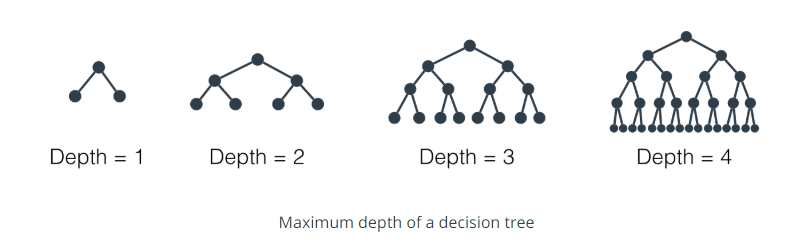

In [122]:
from IPython.display import Image
Image("C:/Users/Murat/Desktop/Depth.png", width=800)

In [48]:
reg.score(X_test,y_test)

0.6281999276801387

-------------------------------------------------------------------------------------------------------------------------------

### Image Classfication (Zusatzpunkte)

### Flickr REST API um Bilder herunterzuladen

#### Verwendung von sowohl Web Scraping als auch API's für den Datenbezug

In [ ]:
import flickrapi
import urllib.request
import os
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

# Working directory
os.chdir('C:/Users/Murat/OneDrive - ZHAW/private/Pictures/train/wohnung')
print(os.getcwd())

# Flickr api access key 
flickr=flickrapi.FlickrAPI('c6a2c45591d4973ff525042472446ca2', '202ffe6f387ce29b', cache=True)

# Keyword --> Nach dem wird gesucht
keyword = 'Wohnungen'

# Settings --> hier werden die Einstellungen für die Sucheeingestellt
photos = flickr.walk(text=keyword,
                     tag_mode='all',
                     tags=keyword,
                     extras='url_c',
                     per_page=10,
                     sort='relevance')

# Initialize list --> Array mit Liste um mit Fotos zu füllen
urls = []

# Derive urls --> For schleife laufen lassen und Bilder sammeln
for i, photo in enumerate(photos):
    url = photo.get('url_c')
    urls.append(url)
    print(urls[i])
    # Get 10 urls
    if i > 300:
        break

# Filter 'None' values from list
urls_clean = list(filter(None, urls)) 
urls_clean

# Print cleaned list
for i, url in enumerate(urls_clean):
        print(urls_clean[i])

In [ ]:
# Download all photos using the urls and save it in the working directory
for i, url in enumerate(urls_clean):
    urllib.request.urlretrieve(url,  str('photo_' + str(i+1) + '.jpg'))

In [ ]:
# Working directory
os.chdir('C:/Users/Murat/OneDrive - ZHAW/private/Pictures/train/villa')
print(os.getcwd())

# Flickr api access key 
flickr=flickrapi.FlickrAPI('c6a2c45591d4973ff525042472446ca2', '202ffe6f387ce29b', cache=True)

# Keyword --> Nach dem wird gesucht
keyword = 'Villa'

# Settings --> hier werden die Einstellungen für die Sucheeingestellt
photos = flickr.walk(text=keyword,
                     tag_mode='all',
                     tags=keyword,
                     extras='url_c',
                     per_page=10,
                     sort='relevance')

# Initialize list --> Array mit Liste um mit Fotos zu füllen
urls = []

# Derive urls --> For schleife laufen lassen und Bilder sammeln
for i, photo in enumerate(photos):
    url = photo.get('url_c')
    urls.append(url)
    print(urls[i])
    # Get 10 urls
    if i > 300:
        break

# Filter 'None' values from list
urls_clean = list(filter(None, urls)) 
urls_clean

# Print cleaned list
for i, url in enumerate(urls_clean):
        print(urls_clean[i])

In [ ]:
# Download all photos using the urls and save it in the working directory
for i, url in enumerate(urls_clean):
    urllib.request.urlretrieve(url,  str('photo_' + str(i+1) + '.jpg'))

#### Um den Speicherverbrauch gering zu halten (über 500 Fotos) haben wir die Bilder nicht hochgeladen, aber wir haben Screenshots erstellt.

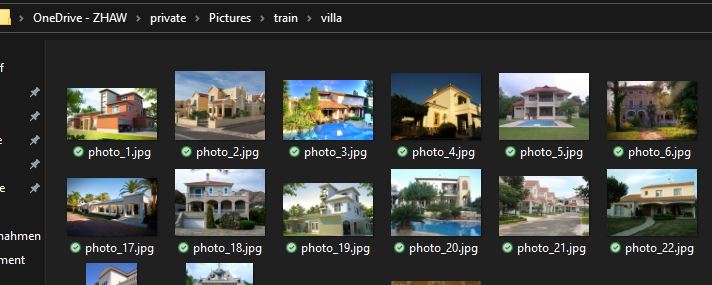

In [7]:
from IPython.display import Image
Image("C:/Users/Murat/Desktop/Villa.png", width=500)

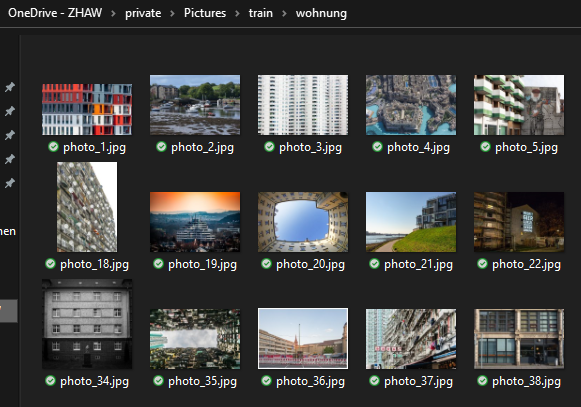

In [6]:
from IPython.display import Image
Image("C:/Users/Murat/Desktop/Wohnung.png", width=500)

In [181]:
train_villa_dir = os.path.join('C:/Users/Murat/OneDrive - ZHAW/private/Pictures/train/villa')

train_wohnung_dir = os.path.join('C:/Users/Murat/OneDrive - ZHAW/private/Pictures/train/wohnung')

valid_villa_dir = os.path.join('C:/Users/Murat/OneDrive - ZHAW/private/Pictures/valid/villa')

valid_wohnung_dir = os.path.join('C:/Users/Murat/OneDrive - ZHAW/private/Pictures/valid/wohnung')

In [182]:
print('total training villa images:', len(os.listdir(train_villa_dir)))
print('total training wohnung images:', len(os.listdir(train_wohnung_dir)))
print('total validation villa images:', len(os.listdir(valid_villa_dir)))
print('total validation wohnung images:', len(os.listdir(valid_wohnung_dir)))

total training villa images: 193
total training wohnung images: 240
total validation villa images: 44
total validation wohnung images: 46


#### Verwendung einer fortgeschrittenen Deep Learning Struktur/Technik Transfer Learning

In [183]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

IMG_SIZE = (200,200)

train_dataset = train_datagen.flow_from_directory(
        'C:/Users/Murat/OneDrive - ZHAW/private/Pictures/train/',  # Source dir for training images
        classes = ['villa', 'wohnung'],
        target_size=IMG_SIZE,  # All images will be resized to 200x200
        batch_size=350,
        # binary labels
        class_mode='binary',
        seed=42,
        shuffle=True)

# Flow validation images in batches of 19 using valid_datagen generator
validation_dataset = validation_datagen.flow_from_directory(
        'C:/Users/Murat/OneDrive - ZHAW/private/Pictures/valid/',  # Source dir for validation images
        classes = ['villa', 'wohnung'],
        target_size=IMG_SIZE,  # All images will be resized to 200x200
        batch_size=85,
        # binary labels
        class_mode='binary',
        seed=42,
        shuffle=True)

Found 433 images belonging to 2 classes.
Found 90 images belonging to 2 classes.


In [184]:
model = Sequential()
model.add(MobileNetV2(include_top = False, weights="imagenet", input_shape=(200, 200, 3)))
model.add(tf.keras.layers.GlobalAveragePooling2D())
#model.add(tf.keras.layers.Dense(10, activation="relu"))
model.add(tf.keras.layers.Dropout(0.2)) # Regularize with dropout
model.add(Dense(1, activation = 'sigmoid'))
model.layers[0].trainable = False

In [185]:
# Loss Function & evaluation metriken
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [186]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_9 ( (None, 1280)              0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [187]:
history = model.fit(train_dataset,
                    epochs=15,
                    validation_data=validation_dataset)

Epoch 1/15
2/2 [==============================] - 15s 8s/step - loss: 0.8535 - accuracy: 0.4550 - val_loss: 0.5976 - val_accuracy: 0.7444
Epoch 2/15
2/2 [==============================] - 5s 3s/step - loss: 0.7559 - accuracy: 0.5566 - val_loss: 0.4968 - val_accuracy: 0.8444
Epoch 3/15
2/2 [==============================] - 18s 9s/step - loss: 0.6091 - accuracy: 0.6790 - val_loss: 0.4170 - val_accuracy: 0.8889
Epoch 4/15
2/2 [==============================] - 17s 9s/step - loss: 0.5139 - accuracy: 0.7714 - val_loss: 0.3489 - val_accuracy: 0.9333
Epoch 5/15
2/2 [==============================] - 6s 3s/step - loss: 0.4607 - accuracy: 0.7898 - val_loss: 0.2967 - val_accuracy: 0.9444
Epoch 6/15
2/2 [==============================] - 6s 3s/step - loss: 0.3963 - accuracy: 0.8499 - val_loss: 0.2564 - val_accuracy: 0.9444
Epoch 7/15
2/2 [==============================] - 5s 2s/step - loss: 0.3372 - accuracy: 0.8868 - val_loss: 0.2254 - val_accuracy: 0.9556
Epoch 8/15
2/2 [======================

In [188]:
test_loss, test_acc = model.evaluate(validation_dataset, verbose=2)

print('\nTest accuracy:', test_acc)

2/2 - 0s - loss: 0.1227 - accuracy: 0.9667

Test accuracy: 0.9666666388511658


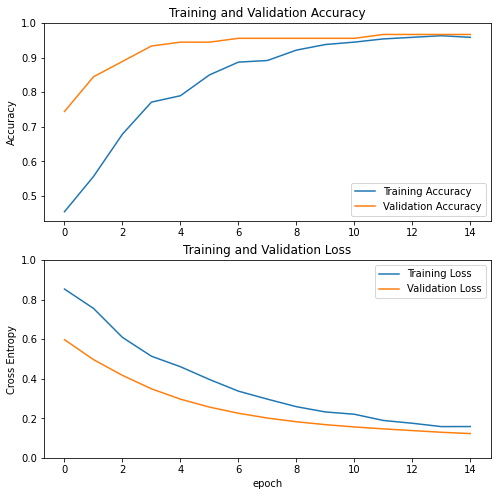

In [189]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

Die Validierungsmetriken sind besser als die Trainingsmetriken, weil die Layers wie tf.keras.layers.batchNormalization und dropout die Genaugkeit beim Training beeinflussen und sie werden bei der Berechnung des Validierungsverlustes ausgeschaltet

Des Weiteren liegt es in geringerem Masse auch daran, dass die Trainingsmetriken den Durchschnitt für eine Epoche berichten, während die Validierungsmetriken nach der Epoche ausgewertet werden, sodass die Validierungsmetriken ein Modell sehen, das etwas länger trainiert wurde.


### (4) Versionierung und Verfügbarmachen der Daten und des Modells über GitHub

Link zu GitHub: 